# Exercises

**[1.1](https://core-econ.org/the-economy/book/text/01.html#exercise-11-inequality-in-the-fourteenth-century)** Inequality in the fourteenth century

What do you think a ‘skyscraper’ figure like Figure 1.2 would have looked like at the time of Ibn Battuta (early to mid-fourteenth century)?

The skyscrapers wouldn't be that tall. The inequality has grown since then, so the difference between 90th percentile and 10th percentile wouldn't be that high, i.e. the incline wouldn't be that sharp.
The difference between countries were not that high. So overall all the countries would would have very few skyscrapers and overall the whole landscape would be flatter.


**[1.2](https://core-econ.org/the-economy/book/text/01.html#exercise-12-working-with-income-data)** Working with income data

You can see the interactive graph and download the spreadsheet [data](http://tinyco.re/7444763) that we used to create Figure 1.2. Choose five countries that you are interested in.

    For each one calculate the 90/10 ratio in 1980, 1990 and 2014.
    Describe the differences between countries and the changes over time that you find.
    Can you think of any explanations for them?


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/Users/sidmitra/Library/Caches/pypoetry/virtualenvs/coreecon-oReBlZOn-py3.7/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
xl_file = pd.ExcelFile("GCIPrawdata.xlsx")
df = xl_file.parse(sheet_name='GCIPrawdata', skiprows=2, header=0)
print(df.head())

       Country  Year  Decile 1 Income  Decile 2 Income  Decile 3 Income  \
0  Afghanistan  1980              206              350              455   
1  Afghanistan  1981              212              361              469   
2  Afghanistan  1982              221              377              490   
3  Afghanistan  1983              238              405              527   
4  Afghanistan  1984              249              424              551   

   Decile 4 Income  Decile 5 Income  Decile 6 Income  Decile 7 Income  \
0              556              665              793              955   
1              574              686              818              986   
2              599              716              854             1029   
3              644              771              919             1107   
4              674              806              961             1157   

   Decile 8 Income  Decile 9 Income  Decile 10 Income  Mean Income  Population  
0             1187           

In [3]:
countries = ['Chile', 'India', 'United Kingdom', 'Argentina', 'Pakistan']
years=[1980, 1990, 2014]

filter_countries = df.Country.isin(countries)
with_countries_df = df[filter_countries]
filter_year = with_countries_df.Year.isin(years)
with_years_df = with_countries_df[filter_year]

filtered = with_years_df[['Country', 'Year', 'Decile 1 Income', 'Decile 10 Income']]
filtered['90/10'] =  filtered['Decile 10 Income'] / filtered['Decile 1 Income']
final = filtered[['Country', 'Year', '90/10']]
final.head(10)

/Users/sidmitra/Library/Caches/pypoetry/virtualenvs/coreecon-oReBlZOn-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Country,Year,90/10
140,Argentina,1980,12.431300
150,Argentina,1990,14.992126
174,Argentina,2014,17.356530
858,Chile,1980,30.144304
868,Chile,1990,36.596252
892,Chile,2014,23.751337
1953,India,1980,15.833333
1963,India,1990,17.626984
1987,India,2014,19.937220
3308,Pakistan,1980,10.048780


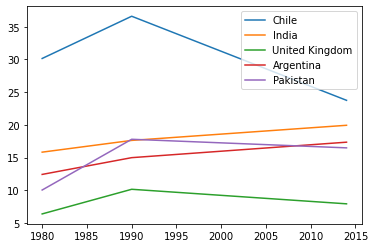

In [4]:
fig, ax = plt.subplots()
for country in countries:
    filter_one_country = final.Country.isin([country])
    tmp_df = final[filter_one_country]
    ax.plot(tmp_df.Year, tmp_df['90/10'], label=country)
legend = ax.legend()
